In [1]:
import cv2 as cv
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
pretrained = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
# Load the pre-trained face detection model
pretrained = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a video capture object
capture = cv.VideoCapture(0)
# capture = cv.VideoCapture('mask.mp4')

data = []
while True:
    ret, img = capture.read()
    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50, 50))
            
            if len(data) < 400:
                data.append(face)
                
        cv.imshow('Window', img)
        if cv.waitKey(2) == 27 or len(data) >= 200:
            break

capture.release()
cv.destroyAllWindows()

In [4]:
np.save('mask.npy', data)

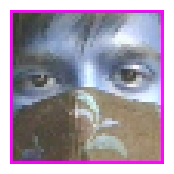

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(data[0])
plt.axis(False)
plt.show()

In [6]:
# Load the pre-trained face detection model
pretrained = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Open a video capture object (0 for the default camera)

capture = cv.VideoCapture(0)
# Alternatively, you can open a video file by providing its path
# capture = cv.VideoCapture('no_mask.mp4')

data = []

while True:
    ret, img = capture.read()
    
    if ret:
        faces = pretrained.detectMultiScale(img)
        
        for x, y, w, h in faces:
            cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv.resize(face, (50, 50))
            #print(len(data))
            
            # Check if data list is less than 400 and append the face
            if len(data) < 400:
                data.append(face)
                
        cv.imshow('Window', img)
        
        # Break the loop if the 'Esc' key is pressed or data list reaches 400
        if cv.waitKey(2) == 27 or len(data) >= 200:
            break

# Release the video capture object and close all windows
capture.release()
cv.destroyAllWindows()

In [7]:
np.save('no_mask.npy', data)

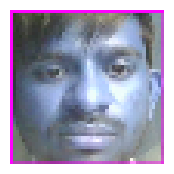

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(data[1])
plt.axis(False)
plt.show()

In [9]:
mask = np.load('mask.npy')
no_mask = np.load('no_mask.npy')

In [10]:
print(mask.shape)
print(no_mask.shape)

(200, 50, 50, 3)
(200, 50, 50, 3)


In [11]:
#convert this 4D data into 2D 
mask =  mask.reshape(200,50*50*3)
no_mask = no_mask.reshape(200,50*50*3)
print(mask.shape)
print(no_mask.shape)

(200, 7500)
(200, 7500)


In [12]:
# Concatenate all rows only
X = np.r_[no_mask, mask]
X.shape

(400, 7500)

In [13]:

y = np.zeros(X.shape[0])
y.shape

(400,)

In [14]:
#1st 200 = mask, other = no mask
y[200:] = 1.0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

320
80
320
80


In [17]:
print(X_train.shape)
print(X_test.shape)

(320, 7500)
(80, 7500)


In [18]:
# 7500 is a big no, this cause slowing our ML process, So Dimensionality Reduction of ML
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)

(320, 3)
(80, 3)


In [19]:
print(X_train[0])

[1494.52973421 -706.49270626  275.73905044]


In [20]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [22]:
y_test

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



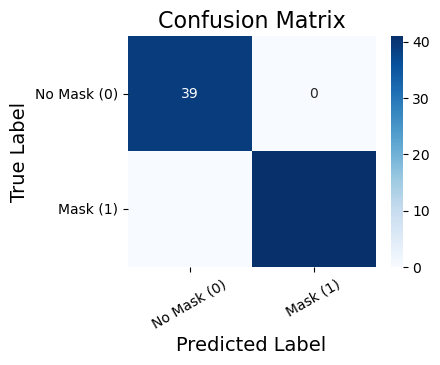

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
g = sns.heatmap(cm, cmap='Blues', annot=True, fmt='g') # fmt='g' = to disable scientific
g.set_xticklabels(labels=['No Mask (0)' , 'Mask (1)'], rotation=30)
g.set_yticklabels(labels=['No Mask (0)' , 'Mask (1)'], rotation=0)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [1]:
capture = cv.VideoCapture(0)
# capture = cv.VideoCapture('full.mp4')
names = {0: 'No Mask', 1: 'Mask'}
data = []
font = cv.FONT_HERSHEY_COMPLEX

while True:
    ret, img = capture.read()

    if ret:
        faces = pretrained.detectMultiScale(img)
        for x, y, w, h in faces:
            cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 4)
            face = img[y:y + h, x:x + w, :]
            face = cv.resize(face, (50, 50))
            face = face.reshape(1, -1)
            face = pca.transform(face)
            pred = model.predict(face)
            n = names[int(pred)]
            cv.putText(img, n, (x, y), font, 1, (244, 250, 250), 2)
            # print(n)

        cv.imshow('Window', img)

        if cv.waitKey(2) == 27:
            break

capture.release()
cv.destroyAllWindows()


NameError: name 'cv' is not defined